# Importing Required packages

In [1]:
!pip install yfinance
!pip install fredapi
!pip install cbpro
!pip install pytz
import yfinance as yf
from fredapi import Fred
import numpy as np
import pandas as pd
import seaborn as sns
from pandas_datareader import data
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import urllib3
import json


Defaulting to user installation because normal site-packages is not writeable
  Using cached requests-2.31.0-py3-none-any.whl (62 kB)
  Attempting uninstall: requests
    Found existing installation: requests 2.13.0
    Uninstalling requests-2.13.0:
      Successfully uninstalled requests-2.13.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anaconda-project 0.11.1 requires ruamel-yaml, which is not installed.
cbpro 1.1.4 requires requests==2.13.0, but you have requests 2.31.0 which is incompatible.
conda-repo-cli 1.0.20 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cli 1.0.20 requires nbformat==5.4.0, but you have nbformat 5.5.0 which is incompatible.
conda-repo-cli 1.0.20 requires requests==2.28.1, but you have requests 2.31.0 which is incompatible.
anaconda-client 1.11.0 requires six>=1.15.0, but you have six 1.10.0 which is incompatible.


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
  Using cached requests-2.13.0-py2.py3-none-any.whl (584 kB)
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anaconda-project 0.11.1 requires ruamel-yaml, which is not installed.
yfinance 0.2.12 requires requests>=2.26, but you have requests 2.13.0 which is incompatible.
tensorboard 2.12.0 requires requests<3,>=2.21.0, but you have requests 2.13.0 which is incompatible.
pandas-datareader 0.10.0 requires requests>=2.19.0, but you have requests 2.13.0 which is incompatible.
openai 0.26.5 requires requests>=2.20, but you have requests 2.13.0 which is incompatible.
geoip2 4.6.0 requires requests<3.0.0,>=2.24.0, but you have requests 2.13.0 which is incompatible.
cookiecutter 1.7.3 requires requests>=2.23.0, but you have requests 2.13.0 which is incompatible.
conda 22.9.0 requires requests>=2.20.1, but you have requests 2.13.0 which is incompatible.
conda-repo-cli 1.0.20 requires clyent==1.2.1, but you have clyent 1.2.2 which

Defaulting to user installation because normal site-packages is not writeable


# Downloading Data from Yahoo Finance!

In [2]:
#ticker
ticker = 'DOGE-USD'
#setting the period
start_date1 = '2017-12-01'
end_date1 = '2023-02-28'
#retrieving dataset
data1 = yf.download(ticker, start=start_date1, end=end_date1)['Adj Close']
# Extract the returns for the current asset
returns = data1.pct_change().dropna()
returns
#setting the window size

[*********************100%***********************]  1 of 1 completed


C:\Anaconda3\lib\site-packages\cryptography\hazmat\backends\openssl\x509.py:14: CryptographyDeprecationWarning: This version of cryptography contains a temporary pyOpenSSL fallback path. Upgrade pyOpenSSL now.
  warnings.warn(


Date
2017-12-02    0.000466
2017-12-03    0.034435
2017-12-04    0.107962
2017-12-05    0.006496
2017-12-06    0.074223
                ...   
2023-02-23   -0.014521
2023-02-24   -0.040241
2023-02-25   -0.001409
2023-02-26    0.017528
2023-02-27   -0.010316
Name: Adj Close, Length: 1914, dtype: float64

<AxesSubplot:xlabel='Date'>

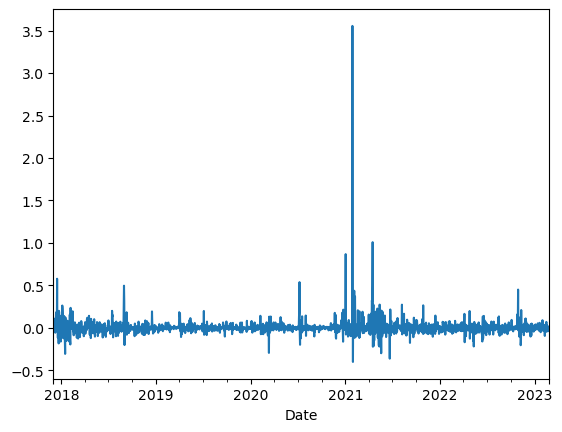

In [3]:
returns.plot()

<AxesSubplot:>

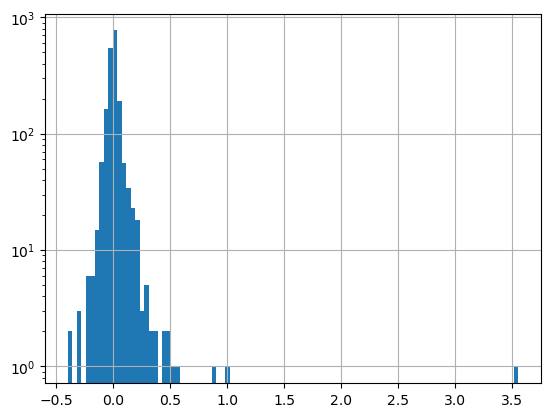

In [4]:
returns.hist(bins=100, log=True)

In [5]:
date_list = returns.index
returns = pd.DataFrame(returns)
returns.reset_index(drop=True, inplace=True)
returns['Date'] = date_list
returns['Date'] = returns['Date'] + pd.DateOffset(days=1)

In [ ]:
returns

# Scraping Twits from StockTwits

In [ ]:
http = urllib3.PoolManager()
ticker = "DOGE.X"
rows = []
for l in range(0, 10000):
    if l == 0:
        url = f"https://api.stocktwits.com/api/2/streams/symbol/{ticker}.json"
    else:
        url = f"https://api.stocktwits.com/api/2/streams/symbol/{ticker}.json?max=" + str(lid)
    print(url)

    r = http.request('GET', url)
    data = json.loads(r.data)

    for t in data["messages"]:
        lid = t["id"]
        date = t["created_at"]
        text = t["body"]
        sentiment = t["entities"]["sentiment"]

        if sentiment == None:
            sentiment = np.nan
        else:
            sentiment = sentiment["basic"]
            if sentiment == "Bullish":
                sentiment = 1
            if sentiment == "Bearish":
                sentiment = -1
        rows.append((date, text, sentiment))

df = pd.DataFrame(rows, columns=["date","text","sentiment"])

#ticker
ticker = 'DOGE-USD'
#setting the period
start_date1 = '2017-12-01'
end_date1 = '2023-02-28'
 
#retrieving dataset
data1 = yf.download(ticker, start=start_date1, end=end_date1)['Adj Close']
 
# Extract the returns for the current asset
returns = data1.pct_change().dropna()
returns

#setting the window size

https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=531405192
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=531396913
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=531391690
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=531388633
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=531386834
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=531383699
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=531361505
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=531352850
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=531345324
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=531331997
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=531319527
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=531288236
https://api.stocktwits.com/api/2/streams/symbol/DOGE

https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=530537189
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=530536328
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=530532499
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=530531114
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=530528049
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=530524815
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=530521836
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=530511532
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=530504920
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=530497554
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=530493589
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=530489347
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=530480478
https://api.stocktwits.com/api/2/strea

https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=529286946
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=529284128
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=529274812
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=529269886
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=529253449
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=529224511
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=529194747
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=529174768
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=529140567
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=529128445
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=529118904
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=529108391
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=529104631
https://api.stocktwits.com/api/2/strea

https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=527972737
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=527957390
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=527951066
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=527946622
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=527942042
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=527931960
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=527916788
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=527879769
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=527853874
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=527821594
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=527783004
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=527777334
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=527774356
https://api.stocktwits.com/api/2/strea

https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=526676735
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=526673234
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=526666976
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=526659496
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=526655450
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=526653287
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=526650540
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=526648903
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=526646833
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=526642112
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=526637460
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=526631145
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=526628004
https://api.stocktwits.com/api/2/strea

https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=525427854
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=525423224
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=525420461
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=525415793
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=525410095
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=525403971
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=525397371
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=525386749
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=525380727
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=525376459
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=525373319
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=525370476
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=525367986
https://api.stocktwits.com/api/2/strea

https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=524181540
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=524178004
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=524173420
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=524169366
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=524167356
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=524162152
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=524155584
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=524150216
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=524145379
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=524142305
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=524137578
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=524129013
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=524119649
https://api.stocktwits.com/api/2/strea

https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=523498139
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=523492826
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=523482670
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=523461147
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=523449246
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=523440222
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=523427773
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=523419740
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=523418553
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=523417988
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=523416518
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=523412570
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=523409797
https://api.stocktwits.com/api/2/strea

https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=522924229
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=522923113
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=522921764
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=522921189
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=522919997
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=522919224
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=522918511
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=522916759
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=522915574
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=522914527
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=522913184
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=522910796
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=522904104
https://api.stocktwits.com/api/2/strea

https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=522124262
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=522121555
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=522119197
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=522116728
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=522115559
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=522114352
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=522113831
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=522110763
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=522106235
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=522101270
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=522098382
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=522095913
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=522093822
https://api.stocktwits.com/api/2/strea

https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=521802053
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=521799705
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=521792132
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=521788366
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=521786506
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=521783950
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=521781660
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=521779188
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=521777533
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=521774316
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=521772328
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=521769713
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=521765324
https://api.stocktwits.com/api/2/strea

https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=521408885
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=521408527
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=521407426
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=521406791
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=521406297
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=521405621
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=521404816
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=521403790
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=521402853
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=521401987
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=521401156
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=521400364
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=521399501
https://api.stocktwits.com/api/2/strea

https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=521320017
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=521319282
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=521318616
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=521318188
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=521317851
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=521317395
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=521316919
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=521316423
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=521315932
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=521315415
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=521314874
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=521314561
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=521314039
https://api.stocktwits.com/api/2/strea

https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=521118554
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=521118154
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=521117812
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=521117344
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=521116875
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=521116043
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=521115537
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=521115193
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=521114752
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=521114301
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=521113813
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=521113407
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=521112930
https://api.stocktwits.com/api/2/strea

https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=519910127
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=519899542
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=519885874
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=519875415
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=519869451
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=519865219
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=519860311
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=519854649
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=519852654
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=519847099
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=519843053
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=519840185
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=519837092
https://api.stocktwits.com/api/2/strea

https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=518717541
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=518694424
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=518679973
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=518664522
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=518643191
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=518627376
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=518590091
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=518567539
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=518545450
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=518540191
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=518538174
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=518534622
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=518530029
https://api.stocktwits.com/api/2/strea

https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=517402707
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=517385589
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=517374657
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=517370042
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=517359352
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=517346378
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=517339737
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=517335195
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=517329649
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=517310277
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=517293651
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=517287240
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=517278497
https://api.stocktwits.com/api/2/strea

https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=516331696
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=516329127
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=516320422
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=516288877
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=516261994
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=516230968
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=516205433
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=516158670
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=516134130
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=516124466
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=516114626
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=516099899
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=516086956
https://api.stocktwits.com/api/2/strea

https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=514360693
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=514356626
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=514348815
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=514343253
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=514336221
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=514328507
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=514315544
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=514308146
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=514303251
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=514299716
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=514292944
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=514288419
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=514285124
https://api.stocktwits.com/api/2/strea

https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=513129930
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=513127335
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=513121010
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=513115661
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=513113727
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=513109966
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=513098202
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=513087404
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=513080029
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=513076058
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=513073410
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=513070524
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=513064545
https://api.stocktwits.com/api/2/strea

https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=511903397
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=511901851
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=511901019
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=511900695
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=511900478
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=511900257
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=511897104
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=511894871
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=511893314
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=511892290
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=511888983
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=511885037
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=511879506
https://api.stocktwits.com/api/2/strea

https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=510712283
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=510705295
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=510700689
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=510694657
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=510689584
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=510683415
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=510680173
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=510677727
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=510661710
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=510635338
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=510609456
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=510584932
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=510571094
https://api.stocktwits.com/api/2/strea

https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=510069048
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=510062213
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=510055619
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=510048446
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=510040331
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=510029790
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=510018545
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=510003525
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=509981243
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=509956237
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=509931317
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=509910084
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=509892556
https://api.stocktwits.com/api/2/strea

https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=509257063
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=509256582
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=509256245
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=509255892
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=509255743
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=509255389
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=509254961
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=509253776
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=509252998
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=509251725
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=509251289
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=509250780
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=509249262
https://api.stocktwits.com/api/2/strea

https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=508758884
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=508740153
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=508710088
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=508691678
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=508680470
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=508676654
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=508673869
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=508665525
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=508660828
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=508656390
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=508648370
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=508639867
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=508621928
https://api.stocktwits.com/api/2/strea

https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=507703895
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=507702564
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=507701169
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=507700013
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=507699001
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=507697886
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=507697315
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=507696809
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=507695655
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=507694952
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=507693612
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=507693034
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=507692553
https://api.stocktwits.com/api/2/strea

https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=507142077
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=507136685
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=507132025
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=507125854
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=507120093
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=507114353
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=507106189
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=507094443
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=507078583
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=507063221
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=507052663
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=507032730
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=507028719
https://api.stocktwits.com/api/2/strea

https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=506541346
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=506538063
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=506533971
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=506531591
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=506529388
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=506528725
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=506527527
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=506525446
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=506523058
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=506521386
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=506519562
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=506518050
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=506516760
https://api.stocktwits.com/api/2/strea

https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=506196548
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=506192639
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=506188403
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=506183760
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=506180918
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=506178770
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=506173802
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=506168879
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=506161606
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=506151270
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=506135967
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=506126704
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=506119090
https://api.stocktwits.com/api/2/strea

https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=505333598
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=505323633
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=505317746
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=505310065
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=505308539
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=505305393
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=505300256
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=505295979
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=505292443
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=505288332
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=505283956
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=505279636
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=505277929
https://api.stocktwits.com/api/2/strea

https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=504511620
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=504504352
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=504498454
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=504488359
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=504469673
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=504440239
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=504412015
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=504405210
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=504402863
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=504400324
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=504397093
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=504395367
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=504393753
https://api.stocktwits.com/api/2/strea

https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=504032116
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=504029795
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=504027875
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=504026916
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=504024006
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=504020960
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=504017959
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=504015486
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=504013312
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=504011149
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=504008636
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=504003600
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=503996065
https://api.stocktwits.com/api/2/strea

https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=503200798
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=503199739
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=503198607
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=503196882
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=503195702
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=503194502
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=503193545
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=503192885
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=503191136
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=503189897
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=503187744
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=503185976
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=503184138
https://api.stocktwits.com/api/2/strea

https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=502384704
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=502363949
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=502355806
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=502349006
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=502345997
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=502344022
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=502342210
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=502339263
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=502337416
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=502333520
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=502331634
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=502329148
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=502327277
https://api.stocktwits.com/api/2/strea

https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=501770733
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=501764990
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=501760545
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=501757563
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=501750176
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=501745295
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=501740701
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=501736090
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=501725647
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=501719842
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=501709077
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=501691401
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=501671160
https://api.stocktwits.com/api/2/strea

https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=500892465
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=500891012
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=500890091
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=500889443
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=500887562
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=500883239
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=500879662
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=500877728
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=500874907
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=500872237
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=500870466
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=500863650
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=500860678
https://api.stocktwits.com/api/2/strea

https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=500071601
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=500067696
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=500065221
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=500062467
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=500058608
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=500055561
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=500053509
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=500047261
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=500043677
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=500040900
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=500038522
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=500035222
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=500032025
https://api.stocktwits.com/api/2/strea

https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=499522843
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=499522177
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=499521445
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=499520627
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=499519216
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=499518072
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=499517513
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=499516525
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=499514338
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=499512989
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=499511229
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=499508188
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=499506042
https://api.stocktwits.com/api/2/strea

https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=498941524
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=498940739
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=498938257
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=498934095
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=498929171
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=498925065
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=498917010
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=498906534
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=498895486
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=498888073
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=498883370
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=498878510
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=498873382
https://api.stocktwits.com/api/2/strea

https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=498496222
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=498495981
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=498495770
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=498495124
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=498494605
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=498494058
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=498491536
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=498486306
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=498481324
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=498473010
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=498466093
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=498458196
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=498443642
https://api.stocktwits.com/api/2/strea

https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=498243428
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=498242579
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=498241854
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=498241538
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=498241398
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=498241270
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=498241020
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=498240775
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=498240586
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=498240265
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=498240092
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=498239979
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=498239842
https://api.stocktwits.com/api/2/strea

https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=498139009
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=498136690
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=498135451
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=498134199
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=498132397
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=498130278
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=498128539
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=498125738
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=498123683
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=498119904
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=498116950
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=498113618
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=498109037
https://api.stocktwits.com/api/2/strea

https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=497524718
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=497522272
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=497517193
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=497514793
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=497512144
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=497510555
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=497508661
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=497507182
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=497502846
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=497498056
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=497495644
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=497489659
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=497485690
https://api.stocktwits.com/api/2/strea

https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=497098128
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=497086152
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=497067231
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=497049136
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=497031452
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=497016319
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=496990263
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=496970432
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=496954638
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=496942051
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=496935460
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=496930505
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=496927560
https://api.stocktwits.com/api/2/strea

https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=496189786
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=496186240
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=496184027
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=496181304
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=496178428
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=496175903
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=496173559
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=496171708
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=496167986
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=496164398
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=496157016
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=496154337
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=496150137
https://api.stocktwits.com/api/2/strea

https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=495804322
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=495802661
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=495801099
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=495799456
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=495798088
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=495795817
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=495794403
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=495792288
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=495790263
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=495788195
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=495787049
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=495786196
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=495785302
https://api.stocktwits.com/api/2/strea

https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=495453174
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=495447826
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=495442014
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=495433857
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=495426802
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=495417491
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=495411039
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=495400582
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=495391484
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=495380930
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=495373846
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=495368396
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=495358882
https://api.stocktwits.com/api/2/strea

https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=494942003
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=494937715
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=494935906
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=494934292
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=494932321
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=494929378
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=494926365
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=494923721
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=494920273
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=494918874
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=494916602
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=494914580
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=494912310
https://api.stocktwits.com/api/2/strea

https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=494644772
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=494644052
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=494643304
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=494642563
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=494642038
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=494641471
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=494641066
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=494640793
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=494640194
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=494639610
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=494639144
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=494638461
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=494637465
https://api.stocktwits.com/api/2/strea

https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=494366471
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=494365662
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=494364649
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=494363751
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=494362999
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=494362207
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=494359393
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=494357710
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=494356035
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=494353972
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=494352238
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=494351223
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=494349285
https://api.stocktwits.com/api/2/strea

https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=494234390
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=494232799
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=494231720
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=494230366
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=494228765
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=494227472
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=494226103
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=494224848
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=494224400
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=494223611
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=494222821
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=494221749
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=494220404
https://api.stocktwits.com/api/2/strea

In [ ]:
# Convert the 'Timestamp' column to datetime type
df['date'] = pd.to_datetime(df['date'])
# Convert the timestamps from GMT to CET
df['date'] = df['date'].dt.tz_convert('Europe/Paris')

In [ ]:
df

In [ ]:
df.to_excel('stocktwits_data.xlsx')

# I. Classification with Different Dataset Sizes

# II. Classification with Varying ngrams

# III. Classification with Different Text Processing Methods

## Benchmark
\textit{unigram and bigram text features without text preprocessing}

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score

# Prepare data
# Here, ngram_range=(1, 2) generates unigrams and bigrams
count_vectorizer = CountVectorizer(lowercase=False, tokenizer=lambda x: x, ngram_range=(1, 2))
X = count_vectorizer.fit_transform(lower_text)
y = labels  # labels corresponding to your text data

# Apply classifier
clf = MultinomialNB()
scores = cross_val_score(clf, X, y, cv=10)  # 10-fold cross-validation

## Punctuation

In [ ]:
from nltk.tokenize import WordPunctTokenizer

# Tokenize using WordPunctTokenizer which keeps punctuation
tokenizer = WordPunctTokenizer()
tokenized_text = [tokenizer.tokenize(i) for i in text]
lower_text = [[word.lower() for word in sent] for sent in tokenized_text]


# Prepare data
X = count_vectorizer.fit_transform(lower_text)

# Apply classifier
scores = cross_val_score(clf, X, y, cv=10)  # 10-fold cross-validation

## Stem

In [ ]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

def stem_sentence(sentence):
   return [stemmer.stem(word) for word in sentence]

lowered_text = [[word.lower() for word in sent] for sent in text_list]
stemmed_text = [stem_sentence(sentence) for sentence in lowered_text] #handle the source please


# Prepare data
X = count_vectorizer.fit_transform(stemmed_text)

# Apply classifier
scores = cross_val_score(clf, X, y, cv=10)  # 10-fold cross-validation

## Emoticons

In [ ]:
import emoji

def handle_emojis(text):
   # Translate the emoji into word strings
   return emoji.demojize(text, delimiters=(' ', ' '))

handled_emoji_text = [handle_emojis(sentence) for sentence in lowered_text]


X = count_vectorizer.fit_transform(handled_emoji_text)

# Apply classifier
scores = cross_val_score(clf, X, y, cv=10)  # 10-fold cross-validation

In [ ]:
# Prepare data
X = count_vectorizer.fit_transform(stemmed_text)

# Apply classifier
scores = cross_val_score(clf, X, y, cv=10)  # 10-fold cross-validation

## StopWords

In [ ]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def remove_stopwords(sentence):
   return [word for word in sentence if word not in stop_words]

no_stopwords_text = [remove_stopwords(sentence) for sentence in lowered_text]

X = count_vectorizer.fit_transform(no_stopwords_text)

# Apply classifier
scores = cross_val_score(clf, X, y, cv=10)  # 10-fold cross-validation

## PosTagin

In [ ]:
from nltk import pos_tag

def add_pos_tag(sentence):
   return [f"{word}_{tag}" for word, tag in pos_tag(sentence)]

pos_tagged_text = [add_pos_tag(sentence) for sentence in lowered_text]


# Prepare data
X = count_vectorizer.fit_transform(pos_tagged_text)

# Apply classifier
scores = cross_val_score(clf, X, y, cv=10)  # 10-fold cross-validation

## Emojis + Punctuation

In [ ]:
# Tokenize using WordPunctTokenizer which keeps punctuation
tokenizer = WordPunctTokenizer()
tokenized_text = [tokenizer.tokenize(i) for i in text]
lower_text = [[word.lower() for word in sent] for sent in tokenized_text]
handled_emoji_text = [handle_emojis(sentence) for sentence in lower_text]

X = count_vectorizer.fit_transform(handled_emoji_text)

# Apply classifier
scores = cross_val_score(clf, X, y, cv=10)  # 10-fold cross-validation

# IV. Classification with Different Machine Learning Methods

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression  # MaxEnt
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
import time

# Preprocessing
# Assume: tokenized_text is your preprocessed data

# Prepare data
count_vectorizer = CountVectorizer(lowercase=False, tokenizer=lambda x: x, ngram_range=(1, 2), min_df=0.0001)
X = count_vectorizer.fit_transform(tokenized_text)
y = labels  # labels corresponding to your text data

# Split data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models and parameters
models = {
   "Naive Bayes": MultinomialNB(),
   "MaxEnt": LogisticRegression(max_iter=1000), 
   "SVC": LinearSVC(max_iter=1000), 
   "RF": RandomForestClassifier(),
   "MLP": MLPClassifier(max_iter=1000),
}
params = {
   "Naive Bayes": {"alpha": [0.1, 1.0, 10.0]},
   "MaxEnt": {"C": [0.1, 1.0, 10.0]},
   "SVC": {"C": [0.1, 1.0, 10.0]},
   "RF": {"n_estimators": [100, 200, 300]},
   "MLP": {"hidden_layer_sizes": [(50,), (100,)], "learning_rate_init": [0.001, 0.01]}
}

# Grid search, cross-validation, training, and testing
for name, model in models.items():
   gs = GridSearchCV(model, params[name], cv=3, n_jobs=-1)  # 3-fold cross-validation
   start = time.time()
   gs.fit(X_train, y_train)
   end = time.time()
   print(f"Best parameters for {name}: {gs.best_params_}")
   print(f"Best cross-validated score for {name}: {gs.best_score_}")

   # Train and test on best parameters
   best_model = gs.best_estimator_
   best_model.fit(X_train, y_train)
   predictions = best_model.predict(X_test)

   print(f"Accuracy on test set for {name}: {accuracy_score(y_test, predictions)}")
   print(f"Classification report for {name}:\n {classification_report(y_test, predictions)}")

   print(f"Time needed for {name}: {end - start} seconds")

## Multinomial Naive Bayes

## Maximum Entropy

## Support Vector Machine

## Random Forest

## Multiplayer Perceptron